In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hualmay
Processing Record 4 of Set 1 | karaul
City not found. Skipping...
Processing Record 5 of Set 1 | san pedro
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | champerico
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | rosarito
Processing Record 10 of Set 1 | muncar
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | deputatskiy
Processing Record 14 of Set 1 | dunedin
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Se

Processing Record 39 of Set 4 | mar del plata
Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | malatya
Processing Record 42 of Set 4 | liniere
City not found. Skipping...
Processing Record 43 of Set 4 | magan
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | hikari
Processing Record 46 of Set 4 | saint-augustin
Processing Record 47 of Set 4 | teruel
Processing Record 48 of Set 4 | pangnirtung
Processing Record 49 of Set 4 | cesvaine
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | batagay-alyta
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | linhares
Processing Record 4 of Set 5 | benghazi
Processing Record 5 of Set 5 | great bend
Processing Record 6 of Set 5 | sioux lookout
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | coachella
Processing Record 9 of Set 5 | samusu
City not found. Skipping...
Processing Record 10 of Set 5 | nkowakowa
Processing Record 11 of Set 5 | coiha

Processing Record 30 of Set 8 | ocampo
Processing Record 31 of Set 8 | lompoc
Processing Record 32 of Set 8 | komsomolskiy
Processing Record 33 of Set 8 | koryazhma
Processing Record 34 of Set 8 | bouza
Processing Record 35 of Set 8 | nargana
Processing Record 36 of Set 8 | nadvoitsy
Processing Record 37 of Set 8 | chernyshevskiy
Processing Record 38 of Set 8 | saku
Processing Record 39 of Set 8 | talnakh
Processing Record 40 of Set 8 | ialibu
Processing Record 41 of Set 8 | bodaybo
Processing Record 42 of Set 8 | sijunjung
Processing Record 43 of Set 8 | biloela
Processing Record 44 of Set 8 | roebourne
Processing Record 45 of Set 8 | inirida
Processing Record 46 of Set 8 | gat
Processing Record 47 of Set 8 | okhotsk
Processing Record 48 of Set 8 | jinchang
Processing Record 49 of Set 8 | kahului
Processing Record 50 of Set 8 | buraydah
Processing Record 1 of Set 9 | kemijarvi
Processing Record 2 of Set 9 | itarema
Processing Record 3 of Set 9 | rawannawi
City not found. Skipping...
P

Processing Record 21 of Set 12 | lubango
Processing Record 22 of Set 12 | kavaratti
Processing Record 23 of Set 12 | picota
Processing Record 24 of Set 12 | isangel
Processing Record 25 of Set 12 | nolinsk
Processing Record 26 of Set 12 | araxa
Processing Record 27 of Set 12 | yaan
Processing Record 28 of Set 12 | andijon
Processing Record 29 of Set 12 | andenes
Processing Record 30 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 31 of Set 12 | asayita
City not found. Skipping...
Processing Record 32 of Set 12 | the valley
Processing Record 33 of Set 12 | graaff-reinet
Processing Record 34 of Set 12 | chicama
Processing Record 35 of Set 12 | xicotencatl
Processing Record 36 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 37 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 38 of Set 12 | gazanjyk
Processing Record 39 of Set 12 | ornskoldsvik
Processing Record 40 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,50.18,47,44,4.94,US,2022-04-13 01:48:56
1,Punta Arenas,-53.1500,-70.9167,44.71,65,40,26.46,CL,2022-04-13 01:48:56
2,Hualmay,-11.0964,-77.6139,66.76,86,9,9.69,PE,2022-04-13 01:48:57
3,San Pedro,14.3500,121.0167,82.31,83,75,2.30,PH,2022-04-13 01:48:58
4,Clyde River,70.4692,-68.5914,-5.57,84,100,4.61,CA,2022-04-13 01:48:58
5,Champerico,14.3000,-91.9167,84.25,65,89,6.71,GT,2022-04-13 01:48:58
6,Cape Town,-33.9258,18.4232,60.91,95,75,11.50,ZA,2022-04-13 01:46:45
7,Rosarito,32.3333,-117.0333,62.47,44,0,12.64,MX,2022-04-13 01:48:59
8,Muncar,-8.4333,114.3333,83.03,73,94,1.32,ID,2022-04-13 01:49:00
9,Hobart,-42.8794,147.3294,68.25,55,20,14.97,AU,2022-04-13 01:47:35


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649815538.19951

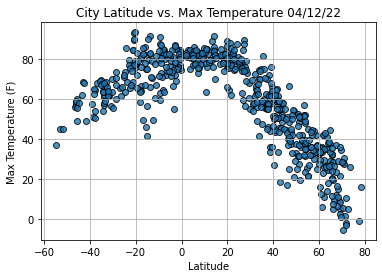

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

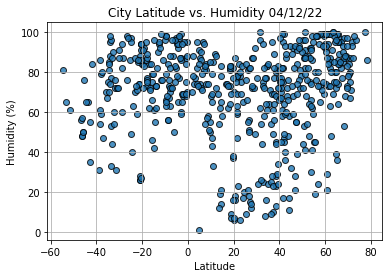

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

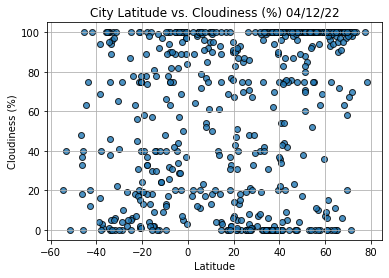

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

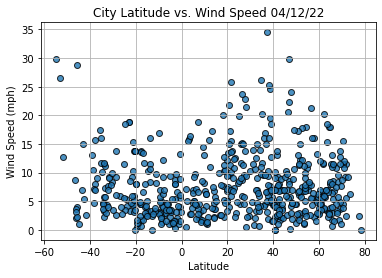

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

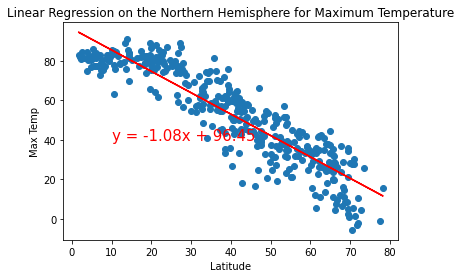

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

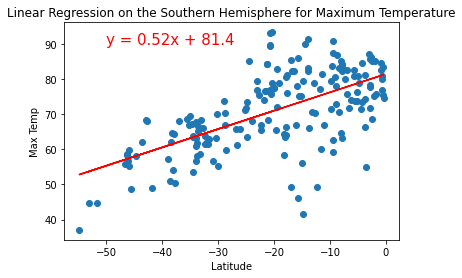

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

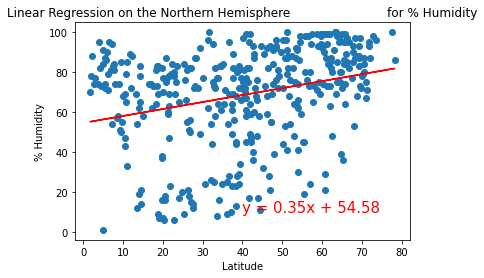

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

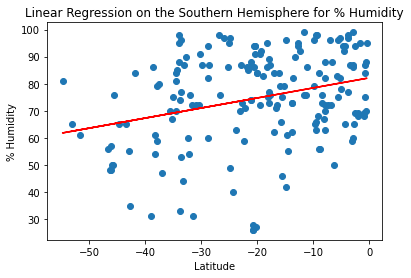

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

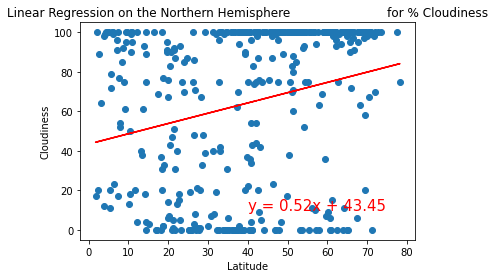

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(40,10))

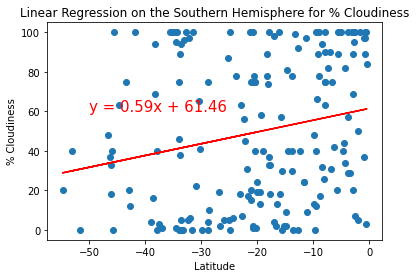

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

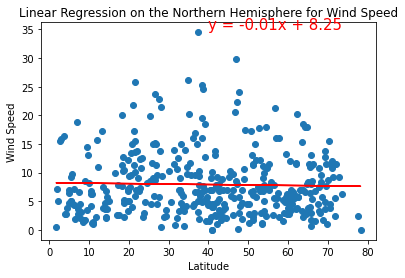

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

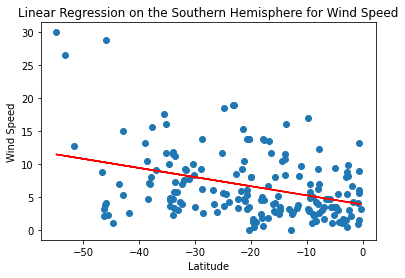

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))